In [1]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils import area_weighting
from isca_tools.plot import plot_spin_up
from isca_tools.utils.radiation import frierson_net_toa_sw_dwn

In [2]:
# Load dataset
exp_name = f'rossbypalooza/depth=20/spin_up/'
exp_name = f'rossbypalooza/dry/depth=20/lat=10_kappa=0_6/bucket/'
exp_name = f'rossbypalooza/depth=20/all_nh/lat_10/base/'
ds = isca_tools.load_dataset(exp_name)
namelist = isca_tools.load_namelist(exp_name)  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']
tau_sw = namelist['two_stream_gray_rad_nml']['atm_abs']

In [22]:
n_years = int(namelist['experiment_details']['n_months_total']/12)
n_year_days = 360
ds_annual_mean = xr.concat([ds.sel(time=slice(i*n_year_days, (i+1)*n_year_days)).mean(dim='time', keepdims=True) for i in range(n_years)], dim='time')
short_wave_net = frierson_net_toa_sw_dwn(ds_annual_mean.swdn_toa, ds_annual_mean.ps, albedo, tau_sw)

(0.0, 14.0)

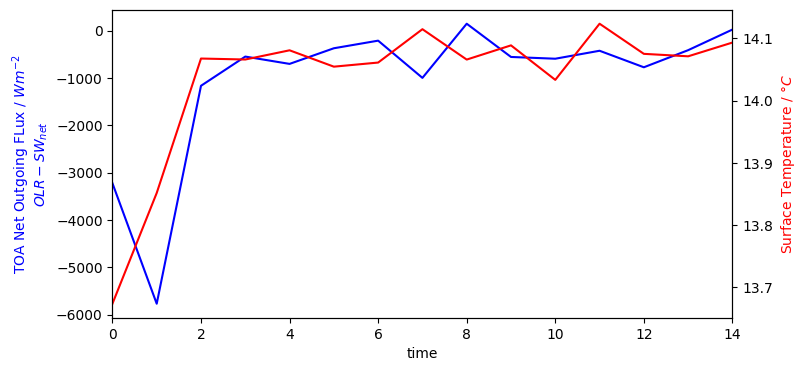

In [26]:
# Plot spinup time for each depth value
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.set_xlabel('time [years]')
plot_spin_up(ds_annual_mean.olr, short_wave_net, ds_annual_mean.t_surf, ax)
ax.set_xlim(0, n_years-1)